<a href="https://colab.research.google.com/github/hyunicecream/Natural-Language-Processing-NLP-/blob/main/7_10_%ED%86%A0(popcorn_word2vec).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Word2Vec을 이용한 감성분석
import numpy as np
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from nltk.stem import LancasterStemmer
from gensim.models import word2vec
import matplotlib.pyplot as plt
import pickle

nltk.download('punkt')

# pickle로 파일을 불러온다. 
with open('/content/drive/MyDrive/머신러닝/popcorn.pkl', 'rb') as f:
    xd_train, yd_train, xd_test, yd_test = pickle.load(f)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
# 문장의 문자열을 token 분리한다. 
sent_tok = [nltk.word_tokenize(sent) for sent in xd_train + xd_test]
sent_tok[0]

['everi',
 'time',
 'see',
 'nicol',
 'like',
 'love',
 'movi',
 'like',
 'woman',
 'give',
 'keep',
 'break',
 'heart',
 'first',
 'movi',
 'rememb',
 'see',
 'like',
 'human',
 'bondag',
 'kim',
 'novak',
 'laurenc',
 'harvey',
 'version',
 'the',
 'beef',
 'correct',
 'russian',
 'spoken',
 'film',
 'petti',
 'good',
 'enough',
 'fool',
 'anybodi',
 'els',
 'speak',
 'russian',
 'sure',
 'funni',
 'peopl',
 'miss',
 'point',
 'the',
 'goodnik',
 'russian',
 'guy',
 'well',
 'cast',
 'final',
 'tip',
 'hat',
 'ben',
 'chaplin',
 'somebodi',
 'els',
 'note',
 'play',
 'sap',
 'great',
 'digniti',
 'definit',
 'heat',
 'nicol',
 'think',
 'guy',
 'get',
 'paid',
 'mind',
 'blow']

In [34]:
# word2vec 모델 생성
# Gensim으로 모델 생성
# Size : 32차원의 벡터 생성
# min_count : 단어에 대한 최소 빈도수. 
# Ex) min_count=5 라면 빈도수 5이하 무시
# window=1 : trigram 으로 사용, 양 옆의 단어 의미파악
# smaple : negative sampling 사용 값을 2로 준다.
# sg : 1 이면 Skip-gram 방법 사용, 0이면 CBOW 방법 사용
# 만약 iter을 준다면 epoch와 같은 뜻으로 학습 반복 횟수를 지정한다. 
EMB_SIZE = 32
model = word2vec.Word2Vec(sent_tok, size = EMB_SIZE, min_count=1, window=1, sg=1, negative=2)
word2idx = model.wv.vocab

In [35]:
print("사전 크기 = ", len(word2idx))

사전 크기 =  49381


In [36]:
# 학습 데이터 문자열을 문장 벡터를 생성한다.
def sentence_vectorize(data):
  vector = []
  for sent in data:
    sent_vect = np.zeros((EMB_SIZE))
    sent_tok = sent.split(' ')
    for word in sent_tok:
      sent_vect += model.wv[word]
    vector.append(sent_vect / len(sent_tok))
  return vector

xd_train_vec = sentence_vectorize(xd_train)
xd_teset_vec = sentence_vectorize(xd_test)

In [37]:
np.array(xd_train_vec).shape

(17500, 32)

In [38]:
np.array(xd_teset_vec).shape

(7500, 32)

In [41]:
x_input = Input(batch_shape = (None, EMB_SIZE))
h_layer = Dense(128, activation='relu')(x_input)
y_output = Dense(1, activation = 'sigmoid')(h_layer)
model = Model(x_input, y_output)
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001))
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [42]:
x_train = np.array(xd_train_vec)
x_test = np.array(xd_teset_vec)
y_train = np.array(yd_train).reshape(-1,1)
y_test = np.array(yd_test).reshape(-1,1)
# x_train
# x_test

In [43]:
# 학습 
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size= 1024, epochs = 100)

Epoch 1/100
18/18 [==============================] - 0s 9ms/step - loss: 0.6843 - val_loss: 0.6713
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6625 - val_loss: 0.6498
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6421 - val_loss: 0.6287
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6210 - val_loss: 0.6077
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6010 - val_loss: 0.5882
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5811 - val_loss: 0.5687
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5629 - val_loss: 0.5526
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5468 - val_loss: 0.5353
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5344 - val_loss: 0.5228
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5207 - val_loss: 0.5113
Epoch 11/

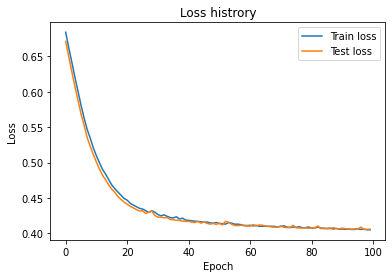

In [44]:
# Loss history를 그린다.
plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_loss'], label = 'Test loss')
plt.legend()
plt.title("Loss histrory")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [45]:
# 시험 데이터로 학습 성능을 평가한다. 
pred = model.predict(x_test)
y_pred = np.where(pred > 0.5, 1, 0)
accuracy = (y_pred == y_test).mean()
print("\nAccuracy = %.2f %s" % (accuracy * 100, '%'))
# Accuracy = 81.33 %


Accuracy = 81.65 %
